In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [79]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

In [80]:
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [81]:
X.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [82]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Normalization using StandardScaler

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

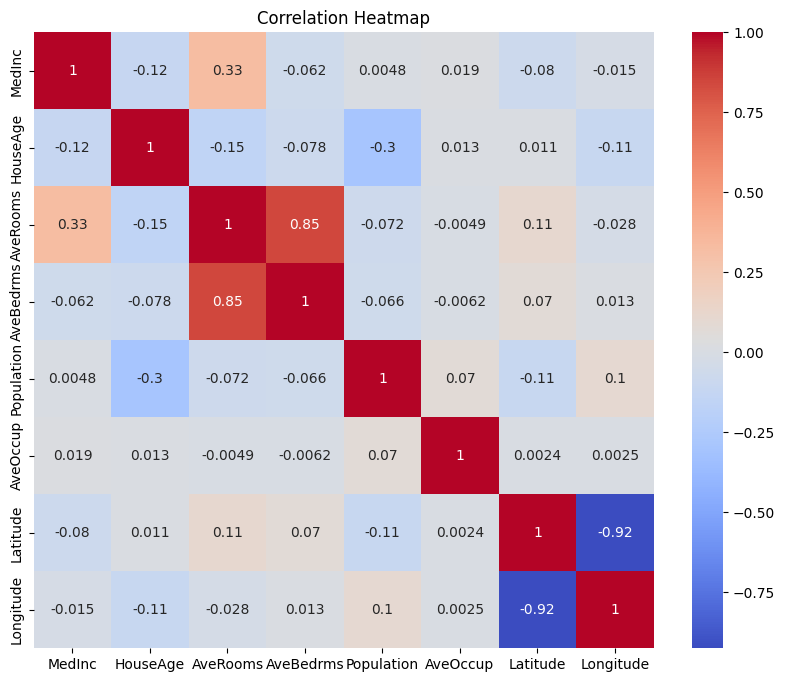

In [84]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

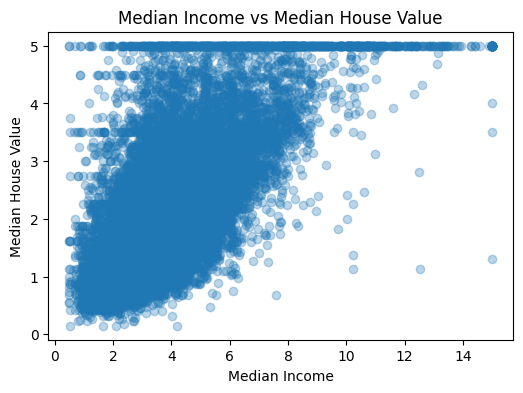

In [85]:
# Scatter plot for median income vs median house value
plt.figure(figsize=(6, 4))
plt.scatter(X['MedInc'], y, alpha=0.3)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

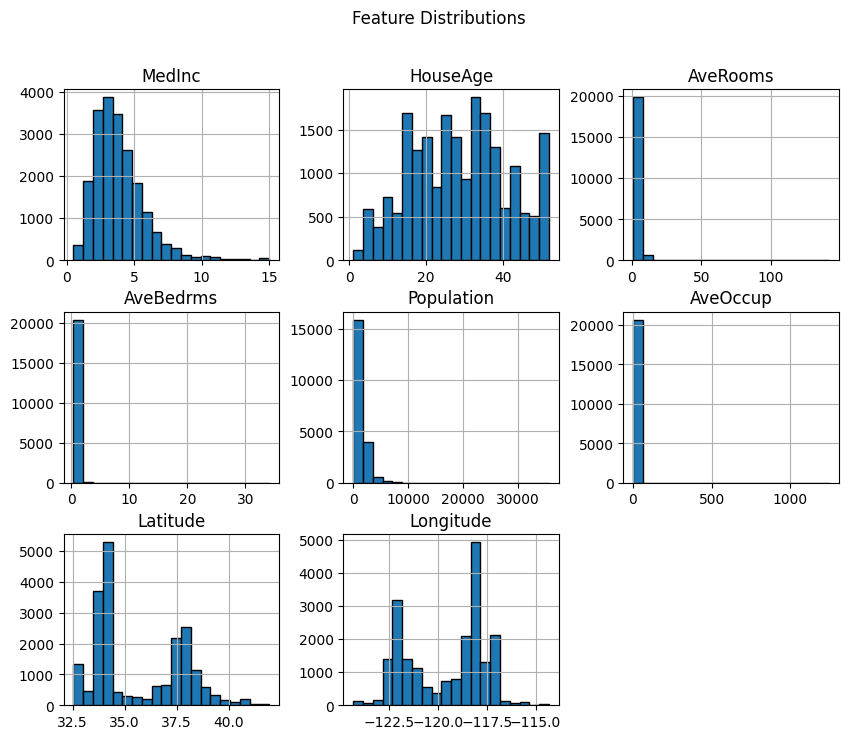

In [86]:
# Histograms of the features
X.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [87]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'RMSE: {rmse:.4f}')
    print(f'R-squared: {r2:.4f}')
    print(f'MAE: {mae:.4f}\n')

# Linear Regression

In [88]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
evaluation_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
print(evaluation_lr)

Linear Regression Performance:
RMSE: 0.7456
R-squared: 0.5758
MAE: 0.5332

None


# Ridge Regression (before tuning)

In [89]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge Regression model
evaluation_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
print(evaluation_ridge)

Ridge Regression Performance:
RMSE: 0.7456
R-squared: 0.5758
MAE: 0.5332

None


# Lasso Regression (before tuning)

In [90]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso Regression model
evaluation_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
print(evaluation_lasso)

Lasso Regression Performance:
RMSE: 1.1449
R-squared: -0.0002
MAE: 0.9061

None


# Hyperparameter Tuning using Cross-Validation

In [91]:
# Hyperparameter tuning using GridSearchCV for Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best Ridge model
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge = Ridge(alpha=best_ridge_alpha)
best_ridge.fit(X_train_scaled, y_train)
y_pred_best_ridge = best_ridge.predict(X_test_scaled)

# Evaluate the tuned Ridge Regression model
evaluation_best_ridge = evaluate_model(y_test, y_pred_best_ridge, "Tuned Ridge Regression")
print(evaluation_best_ridge)

# Hyperparameter tuning using GridSearchCV for Lasso
lasso_params = {'alpha': [0.1, 0.5, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best Lasso model
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso = Lasso(alpha=best_lasso_alpha)
best_lasso.fit(X_train_scaled, y_train)
y_pred_best_lasso = best_lasso.predict(X_test_scaled)

# Evaluate the tuned Lasso Regression model
evaluation_best_lasso = evaluate_model(y_test, y_pred_best_lasso, "Tuned Lasso Regression")
print(evaluation_best_lasso)


Tuned Ridge Regression Performance:
RMSE: 0.7456
R-squared: 0.5758
MAE: 0.5332

None
Tuned Lasso Regression Performance:
RMSE: 0.8244
R-squared: 0.4814
MAE: 0.6222

None


In [92]:
def compare_models():
    models = {
        'Linear Regression': y_pred_lr,
        'Ridge Regression': y_pred_ridge,
        'Lasso Regression': y_pred_lasso,
        'Tuned Ridge Regression': y_pred_best_ridge,
        'Tuned Lasso Regression': y_pred_best_lasso
    }
    rmse_list = []
    r2_list = []
    mae_list = []
    model_names = []
    for model_name, y_pred in models.items():
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        model_names.append(model_name)
        rmse_list.append(rmse)
        r2_list.append(r2)
        mae_list.append(mae)

    comparison_df = pd.DataFrame({
        'Model': model_names,
        'RMSE': rmse_list,
        'R-squared (R²)': r2_list,
        'MAE': mae_list
    })

    return comparison_df
comparison_results = compare_models()
comparison_results

,Model,RMSE,R-squared (R²),MAE
0,Linear Regression,0.745581,0.575788,0.533200
1,Ridge Regression,0.745557,0.575816,0.533193
2,Lasso Regression,1.144856,-0.000219,0.906069
3,Tuned Ridge Regression,0.745579,0.575791,0.533199
4,Tuned Lasso Regression,0.824396,0.481361,0.622201


* Linear regression performs well, explaining about 57.58% of the variance in house prices. The RMSE of 0.745581 shows that the model's predictions are relatively close to actual values. The MAE of 0.533200 indicates moderate average prediction errors.

* Ridge regression performs almost identically to Linear Regression. The regularization in Ridge does not bring significant improvements, possibly because the dataset does not have severe multicollinearity issues. The model explains the same variance as Linear Regression, and the slight reduction in RMSE and MAE is negligible.

* Lasso Regression performs significantly worse than the other models. It has the highest RMSE (1.144856) and the lowest R² (-0.000219), indicating that it does not explain any variance in house prices and performs worse than a simple mean-based model. The MAE (0.906069) reflects higher average prediction errors.The poor performance of Lasso could be due to its tendency to drive some coefficients to zero, effectively removing key features and reducing predictive power in this case.

* After tuning, Ridge regression performs almost exactly the same as the untuned version. The slight differences are not statistically significant, which confirms that the regularization strength chosen by default was already close to optimal.

* The tuned Lasso model improves compared to the untuned version but still performs worse than both Linear and Ridge Regression. It explains 48.13% of the variance in house prices, with higher prediction errors (RMSE: 0.824396 and MAE: 0.622201). This suggests that Lasso regularization, even after tuning, is less suited for this particular dataset.

# Best Performing Model:
* Ridge Regression (both default and tuned) and Linear Regression are the best-performing models based on all three metrics (RMSE, R², and MAE).